In [1]:
using DelimitedFiles
using Plots
using Interpolations
using LaTeXStrings
using QuadGK
using SpecialFunctions

In [2]:
θ12_NO = 34.3*(π/180)
θ23_NO = 49.26*(π/180)
θ13_NO = 8.53*(π/180)
δcp_NO = 194*(π/180)

θ12_IO = 34.3*(π/180)
θ23_IO = 49.46*(π/180)
θ13_IO = 8.58*(π/180)
δcp_IO = 284*(π/180)

U1_NO = [1 0 0;
      0 cos(θ23_NO) sin(θ23_NO);
      0 -sin(θ23_NO) cos(θ23_NO)]

U2_NO = [cos(θ13_NO) 0 sin(θ13_NO)*exp(-im*δcp_NO);
      0 1 0;
      -sin(θ13_NO)*exp(im*δcp_NO) 0 cos(θ13_NO)]

U3_NO = [cos(θ12_NO) sin(θ12_NO) 0;
      -sin(θ12_NO) cos(θ12_NO) 0;
      0 0 1]

U1_IO = [1 0 0;
      0 cos(θ23_IO) sin(θ23_IO);
      0 -sin(θ23_IO) cos(θ23_IO)]

U2_IO = [cos(θ13_IO) 0 sin(θ13_IO)*exp(-im*δcp_IO);
      0 1 0;
      -sin(θ13_IO)*exp(im*δcp_IO) 0 cos(θ13_IO)]

U3_IO = [cos(θ12_IO) sin(θ12_IO) 0;
      -sin(θ12_IO) cos(θ12_IO) 0;
      0 0 1]

U_NO = U1_NO*U2_NO*U3_NO

U_IO = U1_IO*U2_IO*U3_IO;

In [3]:
Usqred_NO = real(U_NO .* conj(U_NO))
Usqred_IO = real(U_IO .* conj(U_IO));

In [4]:
δm2_21 = 7.5e-5 # eV²
δm2_31_NO = 2.55e-3
δm2_31_IO = -2.45e-3

# m2_1_NO (m2_3_NO) set the absolute mass scale, can't be less than 0
m2_1_NO = 0
m2_2_NO = δm2_21
m2_3_NO = δm2_21/2 + δm2_31_NO

m2_3_IO = 0
m2_1_IO = -δm2_31_IO - δm2_21
m2_2_IO = -δm2_31_IO + δm2_21
;

In [5]:
#              time        luminosity               <e>             <e^2>
#               "s"           "foe/s"           "MeV^1"           "MeV^2"

νe_112sm = readdlm("Data/neutrino_signal_nu_e-LS220-s11.2c.data", comments=true)
νebar_112sm = readdlm("Data/neutrino_signal_nubar_e-LS220-s11.2c.data", comments=true)
νx_112sm = readdlm("Data/neutrino_signal_nu_x-LS220-s11.2c.data", comments=true)

νe_270sm = readdlm("Data/neutrino_signal_nu_e-s27.0c-LS220.data", comments=true)
νebar_270sm = readdlm("Data/neutrino_signal_nubar_e-s27.0c-LS220.data", comments=true)
νx_270sm = readdlm("Data/neutrino_signal_nu_x-s27.0c-LS220.data", comments=true)

νe_bh = readdlm("Data/s40s7b2c_neutrino_signal_nu_e.dat", comments=true)
νebar_bh = readdlm("Data/s40s7b2c_neutrino_signal_nubar_e.dat", comments=true)
νx_bh = readdlm("Data/s40s7b2c_neutrino_signal_nu_x.dat", comments=true)
;

In [6]:
# 27 Solar Mass
lum_νe_270sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νe_270sm[:,1]),), νe_270sm[:,2], Gridded(Linear()))
lum_νe_270sm = extrapolate(lum_νe_270sm_ne, 0.0)

em1_νe_270sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νe_270sm[:,1]),), νe_270sm[:,3], Gridded(Linear()))
em1_νe_270sm = extrapolate(em1_νe_270sm_ne, 0.0)

em2_νe_270sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νe_270sm[:,1]),), νe_270sm[:,4], Gridded(Linear()))
em2_νe_270sm = extrapolate(em2_νe_270sm_ne, 0.0)

lum_νebar_270sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νebar_270sm[:,1]),), νebar_270sm[:,2], Gridded(Linear()))
lum_νebar_270sm = extrapolate(lum_νebar_270sm_ne, 0.0)

em1_νebar_270sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νebar_270sm[:,1]),), νebar_270sm[:,3], Gridded(Linear()))
em1_νebar_270sm = extrapolate(em1_νebar_270sm_ne, 0.0)

em2_νebar_270sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νebar_270sm[:,1]),), νebar_270sm[:,4], Gridded(Linear()))
em2_νebar_270sm = extrapolate(em2_νebar_270sm_ne, 0.0)

lum_νx_270sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νx_270sm[:,1]),), νx_270sm[:,2], Gridded(Linear()))
lum_νx_270sm = extrapolate(lum_νx_270sm_ne, 0.0)

em1_νx_270sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νx_270sm[:,1]),), νx_270sm[:,3], Gridded(Linear()))
em1_νx_270sm = extrapolate(em1_νx_270sm_ne, 0.0)

em2_νx_270sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νx_270sm[:,1]),), νx_270sm[:,4], Gridded(Linear()))
em2_νx_270sm = extrapolate(em2_νx_270sm_ne, 0.0)

# 11.2 Solar Mass
lum_νe_112sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νe_112sm[:,1]),), νe_112sm[:,2], Gridded(Linear()))
lum_νe_112sm = extrapolate(lum_νe_112sm_ne, 0.0)

em1_νe_112sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νe_112sm[:,1]),), νe_112sm[:,3], Gridded(Linear()))
em1_νe_112sm = extrapolate(em1_νe_112sm_ne, 0.0)

em2_νe_112sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νe_112sm[:,1]),), νe_112sm[:,4], Gridded(Linear()))
em2_νe_112sm = extrapolate(em2_νe_112sm_ne, 0.0)

lum_νebar_112sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νebar_112sm[:,1]),), νebar_112sm[:,2], Gridded(Linear()))
lum_νebar_112sm = extrapolate(lum_νebar_112sm_ne, 0.0)

em1_νebar_112sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νebar_112sm[:,1]),), νebar_112sm[:,3], Gridded(Linear()))
em1_νebar_112sm = extrapolate(em1_νebar_112sm_ne, 0.0)

em2_νebar_112sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νebar_112sm[:,1]),), νebar_112sm[:,4], Gridded(Linear()))
em2_νebar_112sm = extrapolate(em2_νebar_112sm_ne, 0.0)

lum_νx_112sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νx_112sm[:,1]),), νx_112sm[:,2], Gridded(Linear()))
lum_νx_112sm = extrapolate(lum_νx_112sm_ne, 0.0)

em1_νx_112sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νx_112sm[:,1]),), νx_112sm[:,3], Gridded(Linear()))
em1_νx_112sm = extrapolate(em1_νx_112sm_ne, 0.0)

em2_νx_112sm_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νx_112sm[:,1]),), νx_112sm[:,4], Gridded(Linear()))
em2_νx_112sm = extrapolate(em2_νx_112sm_ne, 0.0)

# Black Hole
lum_νe_bh_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νe_bh[:,1]),), νe_bh[:,2], Gridded(Linear()))
lum_νe_bh = extrapolate(lum_νe_bh_ne, 0.0)

em1_νe_bh_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νe_bh[:,1]),), νe_bh[:,3], Gridded(Linear()))
em1_νe_bh = extrapolate(em1_νe_bh_ne, 0.0)

em2_νe_bh_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νe_bh[:,1]),), νe_bh[:,4], Gridded(Linear()))
em2_νe_bh = extrapolate(em2_νe_bh_ne, 0.0)

lum_νebar_bh_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νebar_bh[:,1]),), νebar_bh[:,2], Gridded(Linear()))
lum_νebar_bh = extrapolate(lum_νebar_bh_ne, 0.0)

em1_νebar_bh_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νebar_bh[:,1]),), νebar_bh[:,3], Gridded(Linear()))
em1_νebar_bh = extrapolate(em1_νebar_bh_ne, 0.0)

em2_νebar_bh_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νebar_bh[:,1]),), νebar_bh[:,4], Gridded(Linear()))
em2_νebar_bh = extrapolate(em2_νebar_bh_ne, 0.0)

lum_νx_bh_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νx_bh[:,1]),), νx_bh[:,2], Gridded(Linear()))
lum_νx_bh = extrapolate(lum_νx_bh_ne, 0.0)

em1_νx_bh_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νx_bh[:,1]),), νx_bh[:,3], Gridded(Linear()))
em1_νx_bh = extrapolate(em1_νx_bh_ne, 0.0)

em2_νx_bh_ne = Interpolations.interpolate((Interpolations.deduplicate_knots!(νx_bh[:,1]),), νx_bh[:,4], Gridded(Linear()))
em2_νx_bh = extrapolate(em2_νx_bh_ne, 0.0)
;

In [7]:
# Commenting out to reduce the notebook size, so it's visible on github
#=
t = νe_270sm[:, 1]

pl_1 = plot(t, [lum_νe_270sm.(t) lum_νebar_270sm.(t) lum_νx_270sm.(t)], xlim=(0, 0.03), ylim=(0, 400), lw=1.5, c=[:blue :red :orange], label=[L"\nu_e" L"\bar{\nu}_e" L"\nu_x"], ylabel=L"L_{\nu_{\beta}}~[\mathrm{foe~s^{-1}}]", legendfontsize=15, yguidefontsize=15)
pl_2 = plot(t, [lum_νe_270sm.(t) lum_νebar_270sm.(t) lum_νx_270sm.(t)], xlim=(0.03, 1.1), ylim=(0, 80), lw=1.5, c=[:blue :red :orange], label=false, title=L"27.0~M_\odot", titlefontsize=17)
pl_3 = plot(t, [lum_νe_270sm.(t) lum_νebar_270sm.(t) lum_νx_270sm.(t)], xlim=(1.1, 11), ylim=(0, 12), lw=1.5, c=[:blue :red :orange], label=false)

pe_1 = plot(t, [em1_νe_270sm.(t) em1_νebar_270sm.(t) em1_νx_270sm.(t)], xlim=(0, 0.03), ylim=(0, 16), lw=1.5, c=[:blue :red :orange], ylabel=L"\langle E_{\nu_\beta} \rangle~[\mathrm{MeV}]", yguidefontsize=15, label=false)
pe_2 = plot(t, [em1_νe_270sm.(t) em1_νebar_270sm.(t) em1_νx_270sm.(t)], xlim=(0.03, 1.1), ylim=(0, 18), lw=1.5, c=[:blue :red :orange], xlabel=L"t_\mathrm{pb}~\mathrm{[s]}", xguidefontsize=15, label=false)
pe_3 = plot(t, [em1_νe_270sm.(t) em1_νebar_270sm.(t) em1_νx_270sm.(t)], xlim=(1.1, 11), ylim=(0, 16), lw=1.5, c=[:blue :red :orange], label=false)

plot(pl_1, pl_2, pl_3, pe_1, pe_2, pe_3, size=(1000,500), layout=(2,3), margins=5Plots.mm)
=#

In [8]:
# Commenting out to reduce the notebook size, so it's visible on github
#=
pl_1 = plot(t, [lum_νe_112sm.(t) lum_νebar_112sm.(t) lum_νx_112sm.(t)], xlim=(0, 0.03), ylim=(0, 400), lw=1.5, c=[:blue :red :orange], label=[L"\nu_e" L"\bar{\nu}_e" L"\nu_x"], ylabel=L"L_{\nu_{\beta}}~[\mathrm{foe~s^{-1}}]", legendfontsize=15, yguidefontsize=15)
pl_2 = plot(t, [lum_νe_112sm.(t) lum_νebar_112sm.(t) lum_νx_112sm.(t)], xlim=(0.03, 1.1), ylim=(0, 80), lw=1.5, c=[:blue :red :orange], label=false, title=L"11.2~M_\odot", titlefontsize=17)
pl_3 = plot(t, [lum_νe_112sm.(t) lum_νebar_112sm.(t) lum_νx_112sm.(t)], xlim=(1.1, 11), ylim=(0, 12), lw=1.5, c=[:blue :red :orange], label=false)

pe_1 = plot(t, [em1_νe_112sm.(t) em1_νebar_112sm.(t) em1_νx_112sm.(t)], xlim=(0, 0.03), ylim=(0, 16), lw=1.5, c=[:blue :red :orange], ylabel=L"\langle E_{\nu_\beta} \rangle~[\mathrm{MeV}]", yguidefontsize=15, label=false)
pe_2 = plot(t, [em1_νe_112sm.(t) em1_νebar_112sm.(t) em1_νx_112sm.(t)], xlim=(0.03, 1.1), ylim=(0, 18), lw=1.5, c=[:blue :red :orange], xlabel=L"t_\mathrm{pb}~\mathrm{[s]}", xguidefontsize=15, label=false)
pe_3 = plot(t, [em1_νe_112sm.(t) em1_νebar_112sm.(t) em1_νx_112sm.(t)], xlim=(1.1, 11), ylim=(0, 16), lw=1.5, c=[:blue :red :orange], label=false)

plot(pl_1, pl_2, pl_3, pe_1, pe_2, pe_3, size=(1000,500), layout=(2,3), margins=5Plots.mm)
=#

In [9]:
# Commenting out to reduce the notebook size, so it's visible on github
#=
t = νe_bh[:,1]

pl_1 = plot(t, [lum_νe_bh.(t) lum_νebar_bh.(t) lum_νx_bh.(t)], xlim=(0, 0.03), ylim=(0, 400), lw=1.5, c=[:blue :red :orange], label=[L"\nu_e" L"\bar{\nu}_e" L"\nu_x"], ylabel=L"L_{\nu_{\beta}}~[\mathrm{foe~s^{-1}}]", legendfontsize=15, yguidefontsize=15)
pl_2 = plot(t, [lum_νe_bh.(t) lum_νebar_bh.(t) lum_νx_bh.(t)], xlim=(0.03, 1.1), ylim=(0, 100), lw=1.5, c=[:blue :red :orange], label=false, title=L"\mathrm{BH}", titlefontsize=17)

pe_1 = plot(t, [em1_νe_bh.(t) em1_νebar_bh.(t) em1_νx_bh.(t)], xlim=(0, 0.03), ylim=(0, 16), lw=1.5, c=[:blue :red :orange], ylabel=L"\langle E_{\nu_\beta} \rangle~[\mathrm{MeV}]", yguidefontsize=15, label=false)
pe_2 = plot(t, [em1_νe_bh.(t) em1_νebar_bh.(t) em1_νx_bh.(t)], xlim=(0.03, 1.1), ylim=(0, 25), lw=1.5, c=[:blue :red :orange], xlabel=L"t_\mathrm{pb}~\mathrm{[s]}", xguidefontsize=15, label=false)

plot(pl_1, pl_2, pe_1, pe_2, size=(600,600), layout=(2,2), margins=5Plots.mm)
=#

In [10]:
lum_νe_bh(0)

114.57941351235026

In [11]:
# β = e (electron), ebar (anti electron), x (non electron)
# sm = small (11.2 SM), large (27.0 SM), bh (Black Hole)

function L(t, β, sm)
    if β == "e" && sm == "small"
        return lum_νe_112sm(t)
    elseif β == "e" && sm == "large"
        return lum_νe_270sm(t)
    elseif β == "e" && sm == "bh"
        return lum_νe_bh(t)
    elseif β == "ebar" && sm == "small"
        return lum_νebar_112sm(t)
    elseif β == "ebar" && sm == "large"
        return lum_νebar_270sm(t)
    elseif β == "ebar" && sm == "bh"
        return lum_νebar_bh(t)    
    elseif β == "x" && sm == "small"
        return lum_νx_112sm(t)
    elseif β == "x" && sm == "large"
        return lum_νx_270sm(t)
    elseif β == "x" && sm == "bh"
        return lum_νx_bh(t)
    else
        return 0
    end
end

function Em1(t, β, sm)
    if β == "e" && sm == "small"
        return em1_νe_112sm(t)
    elseif β == "e" && sm == "large"
        return em1_νe_270sm(t)
    elseif β == "e" && sm == "bh"
        return em1_νe_bh(t)
    elseif β == "ebar" && sm == "small"
        return em1_νebar_112sm(t)
    elseif β == "ebar" && sm == "large"
        return em1_νebar_270sm(t)
    elseif β == "ebar" && sm == "bh"
        return em1_νebar_bh(t)    
    elseif β == "x" && sm == "small"
        return em1_νx_112sm(t)
    elseif β == "x" && sm == "large"
        return em1_νx_270sm(t)
    elseif β == "x" && sm == "bh"
        return em1_νx_bh(t)
    else
        return 0
    end
end

function Em2(t, β, sm)
    if β == "e" && sm == "small"
        return em2_νe_112sm(t)
    elseif β == "e" && sm == "large"
        return em2_νe_270sm(t)
    elseif β == "e" && sm == "bh"
        return em2_νe_bh(t)
    elseif β == "ebar" && sm == "small"
        return em2_νebar_112sm(t)
    elseif β == "ebar" && sm == "large"
        return em2_νebar_270sm(t)
    elseif β == "ebar" && sm == "bh"
        return em2_νebar_bh(t)    
    elseif β == "x" && sm == "small"
        return em2_νx_112sm(t)
    elseif β == "x" && sm == "large"
        return em2_νx_270sm(t)
    elseif β == "x" && sm == "bh"
        return em2_νx_bh(t)
    else
        return 0
    end
end

Em2 (generic function with 1 method)

In [12]:
α(t, β, sm) = (2*Em1(t, β, sm)^2 - Em2(t, β, sm))/(Em2(t, β, sm) - Em1(t, β, sm)^2)

α (generic function with 1 method)

In [114]:
# Commenting out to reduce the notebook size, so it's visible on github
#=
t = range(0, 10, 100000)

pαs_1 = plot(t, [α.(t, "e", "small") α.(t, "ebar", "small") α.(t, "x", "small")], xlim=(0, 0.03), ylim=(0, 8), lw=1.5, c=[:blue :red :orange], label=[L"\nu_e" L"\bar{\nu}_e" L"\nu_x"], ylabel=L"\alpha_{\nu_\beta}", legendfontsize=15, yguidefontsize=15)
pαs_2 = plot(t, [α.(t, "e", "small") α.(t, "ebar", "small") α.(t, "x", "small")], xlim=(0.03, 1.1), ylim=(1, 5), lw=1.5, c=[:blue :red :orange], label=false, title=L"11.2~M_\odot", titlefontsize=17)
pαs_3 = plot(t, [α.(t, "e", "small") α.(t, "ebar", "small") α.(t, "x", "small")], xlim=(1.1, 11), ylim=(2, 3.5), lw=1.5, c=[:blue :red :orange], label=false)

pαl_1 = plot(t, [α.(t, "e", "large") α.(t, "ebar", "large") α.(t, "x", "large")], xlim=(0, 0.03), ylim=(0, 8), lw=1.5, c=[:blue :red :orange], ylabel=L"\alpha_{\nu_\beta}", yguidefontsize=15, label=false)
pαl_2 = plot(t, [α.(t, "e", "large") α.(t, "ebar", "large") α.(t, "x", "large")], xlim=(0.03, 1.1), ylim=(1, 5), lw=1.5, c=[:blue :red :orange], xlabel=L"t_\mathrm{pb}~[\mathrm{s}]", title=L"27.0~M_\odot", titlefontsize=17, xguidefontsize=15, label=false)
pαl_3 = plot(t, [α.(t, "e", "large") α.(t, "ebar", "large") α.(t, "x", "large")], xlim=(1.1, 11), ylim=(2, 3.5), lw=1.5, c=[:blue :red :orange], label=false)

plot(pαs_1, pαs_2, pαs_3, pαl_1, pαl_2, pαl_3, size=(1000,500), layout=(2,3), margins=5Plots.mm)
=#

In [14]:
# Commenting out to reduce the notebook size, so it's visible on github
#=
pαbh_1 = plot(t, [α.(t, "e", "bh") α.(t, "ebar", "bh") α.(t, "x", "bh")], xlim=(0, 0.03), ylim=(0, 8), lw=1.5, c=[:blue :red :orange], label=false)
pαbh_2 = plot(t, [α.(t, "e", "bh") α.(t, "ebar", "bh") α.(t, "x", "bh")], xlim=(0.03, 1.1), ylim=(1, 5), lw=1.5, c=[:blue :red :orange], label=false)
plot(pαbh_1, pαbh_2, layout=(1, 2))
=#

In [15]:
function ϕ0(E, t, β, sm) 

    if Em1(t, β, sm) == 0
        return 0.0
    else
        return (E/Em1(t, β, sm))^(α(t, β, sm))*exp(-(E*(1+α(t, β, sm)))/Em1(t, β, sm))
    end
end;

In [16]:
function ϕints(β, sm)

    nbins = 100000

    if β == "e" && sm == "small"
        ts = range(minimum(νe_112sm[:, 1]), maximum(νe_112sm[:, 1]), nbins)
    elseif β == "e" && sm == "large"
        ts = range(minimum(νe_270sm[:, 1]), maximum(νe_270sm[:, 1]), nbins)
    elseif β == "e" && sm == "bh"
        ts = range(minimum(νe_bh[:, 1]), maximum(νe_bh[:, 1]), nbins)
    elseif β == "ebar" && sm == "small"
        ts = range(minimum(νebar_112sm[:, 1]), maximum(νebar_112sm[:, 1]), nbins)
    elseif β == "ebar" && sm == "large"
        ts = range(minimum(νebar_270sm[:, 1]), maximum(νebar_270sm[:, 1]), nbins)
    elseif β == "ebar" && sm == "bh"
        ts = range(minimum(νebar_bh[:, 1]), maximum(νebar_bh[:, 1]), nbins)   
    elseif β == "x" && sm == "small"
        ts = range(minimum(νx_112sm[:, 1]), maximum(νx_112sm[:, 1]), nbins)
    elseif β == "x" && sm == "large"
        ts = range(minimum(νx_270sm[:, 1]), maximum(νx_270sm[:, 1]), nbins)
    elseif β == "x" && sm == "bh"
        ts = range(minimum(νx_bh[:, 1]), maximum(νx_bh[:, 1]), nbins)
    else
        return 0
    end

    ϕintsvec = quadgk.(e -> ϕ0.(e, ts, β, sm), 0, 50, rtol=1e-8)[1]

    ϕint_ne = Interpolations.interpolate((vec(ts),), ϕintsvec, Gridded(Linear()))
    return extrapolate(ϕint_ne, 0.0)
end

ϕints (generic function with 1 method)

In [17]:
ϕ_νe_270sm, ϕ_νebar_270sm, ϕ_νx_270sm = ϕints("e", "large"), ϕints("ebar", "large"), ϕints("x", "large")
ϕ_νe_112sm, ϕ_νebar_112sm, ϕ_νx_112sm = ϕints("e", "small"), ϕints("ebar", "small"), ϕints("x", "small")
ϕ_νe_bh, ϕ_νebar_bh, ϕ_νx_bh = ϕints("e", "bh"), ϕints("ebar", "bh"), ϕints("x", "bh");

In [18]:
function ξ(t, β, sm)
    if Em1(t, β, sm) == 0
        return 0.0
    else
        if β == "e" && sm == "small"
            return 1/ϕ_νe_112sm(t)
        elseif β == "e" && sm == "large"
            return 1/ϕ_νe_270sm(t)
        elseif β == "e" && sm == "bh"
            return 1/ϕ_νe_bh(t)
        elseif β == "ebar" && sm == "small"
            return 1/ϕ_νebar_112sm(t)
        elseif β == "ebar" && sm == "large"
            return 1/ϕ_νebar_270sm(t)
        elseif β == "ebar" && sm == "bh"
            return 1/ϕ_νebar_bh(t)    
        elseif β == "x" && sm == "small"
            return 1/ϕ_νx_112sm(t)
        elseif β == "x" && sm == "large"
            return 1/ϕ_νx_270sm(t)
        elseif β == "x" && sm == "bh"
            return 1/ϕ_νx_bh(t)
        else
            return 0
        end
    end
end

ξ (generic function with 1 method)

In [19]:
# Using numerical normalization
ϕold(E, t, β, sm) = ξ(t, β, sm)*ϕ0(E, t, β, sm)

ϕold (generic function with 1 method)

In [20]:
intϕ_exact(t, β, sm) = Em1(t, β, sm)^(-α(t, β, sm))*((1+α(t, β, sm))/Em1(t, β, sm))^(-1-α(t, β, sm))*gamma(1+α(t, β, sm))

# Using analytical normalizaiton
function ϕ(E, t, β, sm)
    if Em1(t, β, sm) == 0
        return 0.0
    else
        return ϕ0(E, t, β, sm) / intϕ_exact(t, β, sm)
    end
end

ϕ (generic function with 1 method)

In [88]:
ϕ(10, 0.1, "ebar", "small")

0.0766494563335866

In [89]:
ϕold(10, 0.1, "ebar", "small")

0.07665120469233919

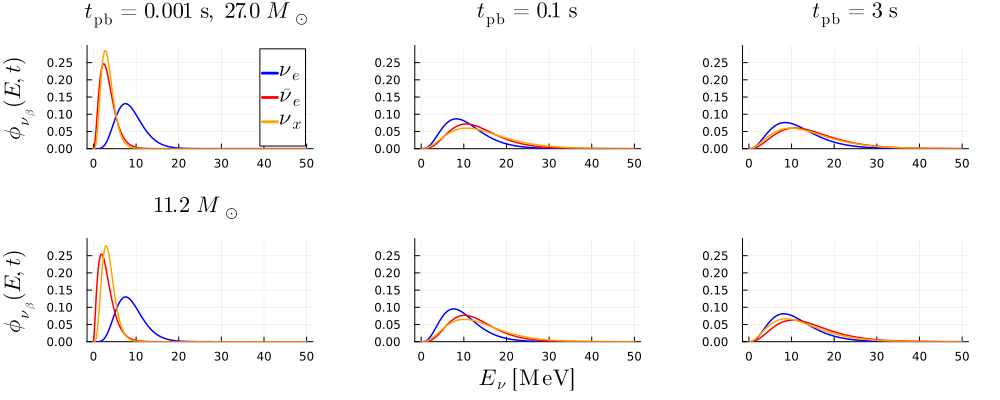

In [96]:
# Commenting out to reduce the notebook size, so it's visible on github

es = range(0, 50, 1000)

p1 = plot(es, 
    [ϕ.(es, 0.001, "e", "large") ϕ.(es, 0.001, "ebar", "large") ϕ.(es, 0.001, "x", "large")], 
    # xlim=(0, 0.03), 
    # ylim=(0, 10), 
    lw=1.5, 
    c=[:blue :red :orange], 
    label=[L"\nu_e" L"\bar{\nu}_e" L"\nu_x"], 
    ylabel=L"\phi_{\nu_\beta}(E, t)", 
    title=L"t_\mathrm{pb} = 0.001~\mathrm{s},~27.0~M_\odot",
    titlefontsize=15,
    legendfontsize=15, 
    yguidefontsize=15)

p2 = plot(es, 
    [ϕ.(es, 0.1, "e", "large") ϕ.(es, 0.1, "ebar", "large") ϕ.(es, 0.1, "x", "large")], 
    # xlim=(0, 0.03), 
    # ylim=(0, 10), 
    lw=1.5, 
    c=[:blue :red :orange], 
    label=false, 
    # ylabel=L"\phi_{\nu_\beta}(E, t)", 
    title=L"t_\mathrm{pb} = 0.1~\mathrm{s}",
    titlefontsize=15,
    legendfontsize=15, 
    yguidefontsize=15)

p3 = plot(es, 
    [ϕ.(es, 1, "e", "large") ϕ.(es, 1, "ebar", "large") ϕ.(es, 3, "x", "large")], 
    # xlim=(0, 0.03), 
    # ylim=(0, 10), 
    lw=1.5, 
    c=[:blue :red :orange], 
    label=false, 
    # ylabel=L"\phi_{\nu_\beta}(E, t)", 
    title=L"t_\mathrm{pb} = 3~\mathrm{s}",
    titlefontsize=15,
    legendfontsize=15, 
    yguidefontsize=15)

p4 = plot(es, 
    [ϕ.(es, 0.001, "e", "small") ϕ.(es, 0.001, "ebar", "small") ϕ.(es, 0.001, "x", "small")], 
    # xlim=(0, 0.03), 
    # ylim=(0, 10), 
    lw=1.5, 
    c=[:blue :red :orange], 
    label=false, 
    ylabel=L"\phi_{\nu_\beta}(E, t)", 
    title=L"11.2~M_\odot",
    titlefontsize=15,
    legendfontsize=15, 
    yguidefontsize=15)

p5 = plot(es, 
    [ϕ.(es, 0.1, "e", "small") ϕ.(es, 0.1, "ebar", "small") ϕ.(es, 0.1, "x", "small")], 
    # xlim=(0, 0.03), 
    # ylim=(0, 10), 
    lw=1.5, 
    c=[:blue :red :orange], 
    label=false, 
    # ylabel=L"\phi_{\nu_\beta}(E, t)", 
    xlabel=L"E_\nu~[\mathrm{MeV}]",
    legendfontsize=15, 
    xguidefontsize=15)

p6 = plot(es, 
    [ϕ.(es, 1, "e", "small") ϕ.(es, 1, "ebar", "small") ϕ.(es, 3, "x", "small")], 
    # xlim=(0, 0.03), 
    # ylim=(0, 10), 
    lw=1.5, 
    c=[:blue :red :orange], 
    label=false, 
    # ylabel=L"\phi_{\nu_\beta}(E, t)", 
    legendfontsize=15, 
    yguidefontsize=15)

plot(p1, p2, p3, p4, p5, p6, layout=(2,3), ylim=(0, 0.3), size=(1000, 400), margins=6Plots.mm)


In [92]:
function dF0(E, t, β, sm) 
    if Em1(t, β, sm) == 0
        return 0.0
    else
        return L(t, β, sm) * ϕ(E, t, β, sm)/Em1(t, β, sm)
    end
end

loe_to_MeV = 6.2415e56

function fake_tint_F0(energy, β, sm)
    ts_int = range(-0.4, 9, 10000)
    dts_int = ts_int[2] - ts_int[1]
    return sum(dts_int * dF0.(energy, ts_int, β, sm))
end;

In [100]:
quadgk(t -> dF0(10, t, "ebar", "small"), -0.4, 9)

(0.15870991493007577, 2.3649484178572583e-9)

In [93]:
fake_tint_F0(10, "ebar", "small")

0.15871060749419974

In [86]:
F0_sim_νebar[101] / loe_to_MeV

0.15032765939093853

In [23]:
function F0_tint(β, sm)
    es = range(0, 50, 1000)
    tintF0 = fake_tint_F0.(es, β, sm)
    F0int_ne = Interpolations.interpolate((vec(es),), tintF0, Gridded(Linear()))
    return extrapolate(F0int_ne, 0.0)
end

F0_tint (generic function with 1 method)

In [24]:
F0_νe_270sm, F0_νebar_270sm, F0_νx_270sm = F0_tint("e", "large"), F0_tint("ebar", "large"), F0_tint("x", "large")
F0_νe_112sm, F0_νebar_112sm, F0_νx_112sm = F0_tint("e", "small"), F0_tint("ebar", "small"), F0_tint("x", "small")
F0_νe_bh, F0_νebar_bh, F0_νx_bh = F0_tint("e", "bh"), F0_tint("ebar", "bh"), F0_tint("x", "bh");

In [67]:
F_sim = readdlm("Data/time-integrated_s11_v2.txt", comments=true);

In [71]:
F_sim_es, F_sim_νe_NO, F_sim_νx_NO, F_sim_νebar_NO, F_sim_νxbar_NO, F_sim_νe_IO, F_sim_νx_IO, F_sim_νebar_IO, F_sim_νxbar_IO, 
F0_sim_νe, F0_sim_νx, F0_sim_νebar, F0_sim_νxbar  = [F_sim[:, i] for i in 1:13];

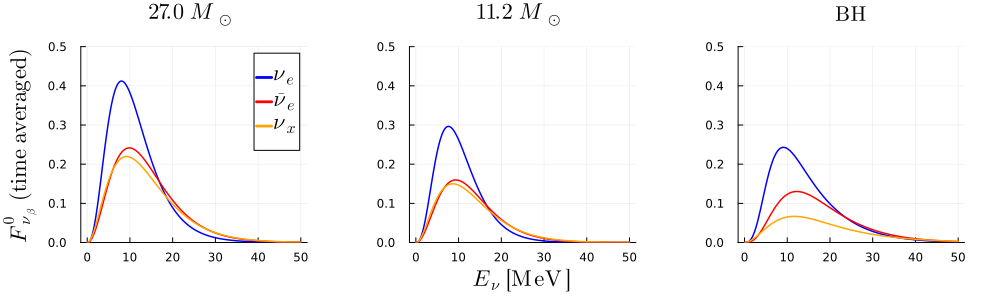

In [27]:
es = range(0, 50, 1000)

p1 = plot(es, 
    [F0_νe_270sm.(es) F0_νebar_270sm.(es) F0_νx_270sm.(es)],
    lw=1.5, 
    c=[:blue :red :orange], 
    label=[L"\nu_e" L"\bar{\nu}_e" L"\nu_x"],
    title=L"27.0~M_\odot",
    ylabel=L"F^0_{\nu_\beta}~\mathrm{(time~averaged)}",
    yguidefontsize=15,
    titlefontsize=15,
    legendfontsize=15,
    ylim=(0, 0.5))

p2 = plot(es, 
    [F0_νe_112sm.(es) F0_νebar_112sm.(es) F0_νx_112sm.(es)],
    lw=1.5, 
    c=[:blue :red :orange], 
    label=false,
    title=L"11.2~M_\odot",
    xlabel=L"E_\nu~\mathrm{[MeV]}",
    titlefontsize=15,
    xguidefontsize=15,
    ylim=(0, 0.5))

p3 = plot(es, 
    [F0_νe_bh.(es) F0_νebar_bh.(es) F0_νx_bh.(es)],
    lw=1.5, 
    c=[:blue :red :orange], 
    label=false,
    title=L"\mathrm{BH}",
    ylim=(0, 0.5))

plot(p1, p2, p3, layout=(1,3), size=(1000, 300), margins=7Plots.mm)
    

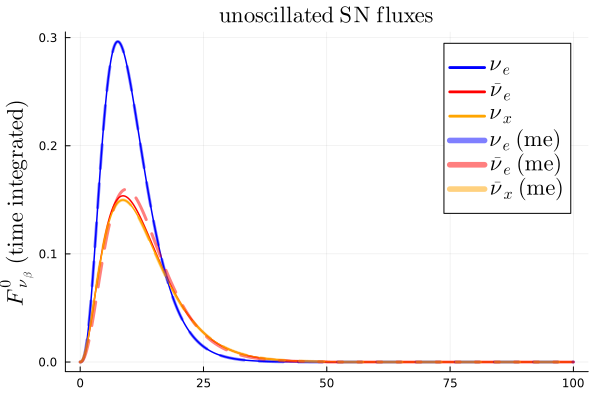

In [98]:
plot(F_sim_es, 
    [F0_sim_νe ./ loe_to_MeV F0_sim_νebar ./ loe_to_MeV F0_sim_νx ./ loe_to_MeV],
    lw=1.5, 
    c=[:blue :red :orange], 
    label=[L"\nu_e" L"\bar{\nu}_e" L"\nu_x"],
    title=L"\mathrm{unoscillated~SN~fluxes}",
    ylabel=L"F^0_{\nu_\beta}~\mathrm{(time~integrated)}",
    yguidefontsize=15,
    titlefontsize=15,
    legendfontsize=15)
plot!(F_sim_es,
     [F0_νe_112sm.(F_sim_es) F0_νebar_112sm.(F_sim_es) F0_νx_112sm.(F_sim_es)],
     lw=3,
     alpha=0.5,
     ls=:dash,
     c=[:blue :red :orange],
     label=[L"\nu_e~\mathrm{(me)}" L"\bar{\nu}_e~\mathrm{(me)}" L"\bar{\nu}_x~\mathrm{(me)}"])

In [61]:
# Accounting for oscillations thru the SN medium

s12 = 0.297
c12 = 1 - s12
PH = 0

F_νe_270sm_NO(E) = s12*PH*(F0_νe_270sm(E) - F0_νx_270sm(E)) + F0_νx_270sm(E)
F_νebar_270sm_NO(E) = c12*(F0_νebar_270sm(E) - F0_νx_270sm(E)) + F0_νx_270sm(E)
F_νe_270sm_IO(E) = s12*(F0_νe_270sm(E) - F0_νx_270sm(E)) + F0_νx_270sm(E)
F_νebar_270sm_IO(E) = c12*PH*(F0_νebar_270sm(E) - F0_νx_270sm(E)) + F0_νx_270sm(E)

F_νe_112sm_NO(E) = s12*PH*(F0_νe_112sm(E) - F0_νx_112sm(E)) + F0_νx_112sm(E)
F_νebar_112sm_NO(E) = s12*F0_νebar_112sm(E) + c12*F0_νx_112sm(E)
F_νe_112sm_IO(E) = s12*(F0_νe_112sm(E) - F0_νx_112sm(E)) + F0_νx_112sm(E)
F_νebar_112sm_IO(E) = c12*PH*(F0_νebar_112sm(E) - F0_νx_112sm(E)) + F0_νx_112sm(E)

F_νe_bh_NO(E) = s12*PH*(F0_νe_bh(E) - F0_νx_bh(E)) + F0_νx_bh(E)
F_νebar_bh_NO(E) = c12*(F0_νebar_bh(E) - F0_νx_bh(E)) + F0_νx_bh(E)
F_νe_bh_IO(E) = s12*(F0_νe_bh(E) - F0_νx_bh(E)) + F0_νx_bh(E)
F_νebar_bh_IO(E) = c12*PH*(F0_νebar_bh(E) - F0_νx_bh(E)) + F0_νx_bh(E)

# ordering = "NO" (normal ordering) or "IO" (inverted ordering)

# To account for decoherent propagation through the vacuum from the SN to us
propnorm_NO = (Usqred_NO[1, 1]^2 + Usqred_NO[1, 2]^2 + Usqred_NO[1, 3]^2)
propnorm_IO = (Usqred_IO[1, 1]^2 + Usqred_IO[1, 2]^2 + Usqred_IO[1, 3]^2)

function F(E, β, sm, ordering)
    if ordering == "NO"
        if β == "e" && sm == "small"
            return F_νe_112sm_NO(E)
        elseif β == "e" && sm == "large"
            return F_νe_270sm_NO(E)
        elseif β == "e" && sm == "bh"
            return F_νe_bh_NO(E)
        elseif β == "ebar" && sm == "small"
            return F_νebar_112sm_NO(E)
        elseif β == "ebar" && sm == "large"
            return F_νebar_270sm_NO(E)
        elseif β == "ebar" && sm == "bh"
            return F_νebar_bh_NO(E)   
        else
            return 0
        end
    elseif ordering == "IO"
        if β == "e" && sm == "small"
            return F_νe_112sm_IO(E)
        elseif β == "e" && sm == "large"
            return F_νe_270sm_IO(E)
        elseif β == "e" && sm == "bh"
            return F_νe_bh_IO(E)
        elseif β == "ebar" && sm == "small"
            return F_νebar_112sm_IO(E)
        elseif β == "ebar" && sm == "large"
            return F_νebar_270sm_IO(E)
        elseif β == "ebar" && sm == "bh"
            return F_νebar_bh_IO(E)   
        else
            return 0
        end
    else
        return 0
    end
end

F (generic function with 1 method)

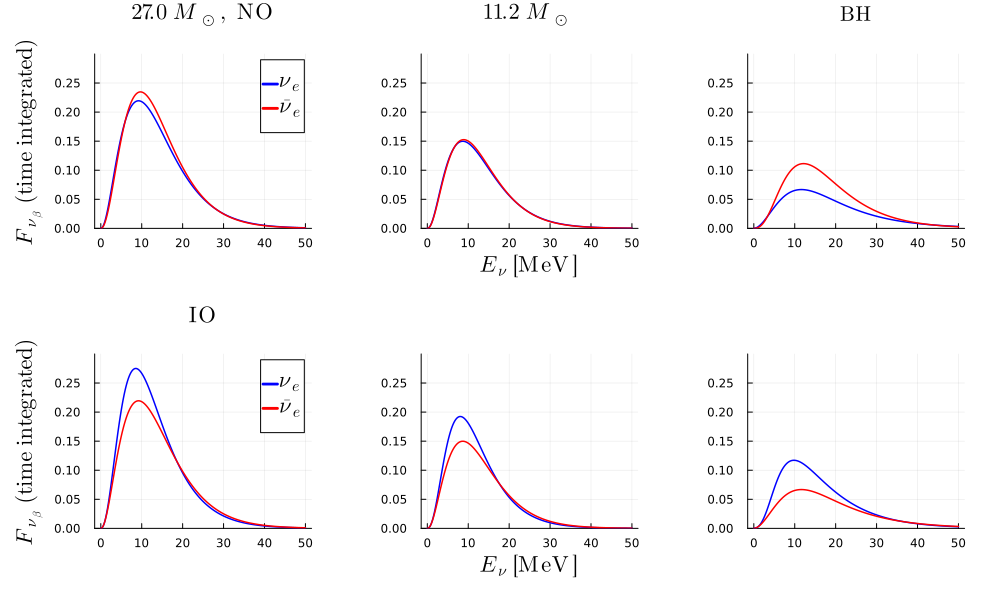

In [62]:
es = range(0, 50, 1000)

p1 = plot(es, 
    [F.(es, "e", "large", "NO") F.(es, "ebar", "large", "NO")],
    lw=1.5, 
    c=[:blue :red :orange], 
    label=[L"\nu_e" L"\bar{\nu}_e"],
    title=L"27.0~M_\odot,~\mathrm{NO}",
    ylabel=L"F_{\nu_\beta}~\mathrm{(time~integrated)}",
    yguidefontsize=15,
    titlefontsize=15,
    legendfontsize=15,
    ylim=(0, 0.3))

p2 = plot(es, 
    [F.(es, "e", "small", "NO") F.(es, "ebar", "small", "NO")],
    lw=1.5, 
    c=[:blue :red :orange], 
    label=false,
    title=L"11.2~M_\odot",
    xlabel=L"E_\nu~\mathrm{[MeV]}",
    titlefontsize=15,
    xguidefontsize=15,
    ylim=(0, 0.3))

p3 = plot(es, 
    [F.(es, "e", "bh", "NO") F.(es, "ebar", "bh", "NO")],
    lw=1.5, 
    c=[:blue :red :orange], 
    label=false,
    title=L"\mathrm{BH}",
    ylim=(0, 0.3))

p4 = plot(es, 
    [F.(es, "e", "large", "IO") F.(es, "ebar", "large", "IO")],
    lw=1.5, 
    c=[:blue :red :orange], 
    label=[L"\nu_e" L"\bar{\nu}_e"],
    title=L"\mathrm{IO}",
    ylabel=L"F_{\nu_\beta}~\mathrm{(time~integrated)}",
    yguidefontsize=15,
    titlefontsize=15,
    legendfontsize=15,
    ylim=(0, 0.3))

p5 = plot(es, 
    [F.(es, "e", "small", "IO") F.(es, "ebar", "small", "IO")],
    lw=1.5, 
    c=[:blue :red :orange], 
    label=false,
    xlabel=L"E_\nu~\mathrm{[MeV]}",
    titlefontsize=15,
    xguidefontsize=15,
    ylim=(0, 0.3))

p6 = plot(es, 
    [F.(es, "e", "bh", "IO") F.(es, "ebar", "bh", "IO")],
    lw=1.5, 
    c=[:blue :red :orange], 
    label=false,
    ylim=(0, 0.3))

plot(p1, p2, p3, p4, p5, p6, layout=(2,3), size=(1000, 600), margins=7Plots.mm)

In [30]:
F.(F_sim_es, "ebar", "small", "NO") .- (F_sim_νebar_NO ./ loe_to_MeV)

1001-element Vector{Float64}:
  0.0
 -3.402653738476268e-6
 -1.6754977205901738e-5
 -4.191860014641461e-5
 -7.950428916097619e-5
 -0.00012953799362536915
 -0.00019168404915412968
 -0.0002653623654383587
 -0.00034982214379404315
 -0.00044419314821517956
 -0.000547523606742973
 -0.0006588093265576887
 -0.0007770166105322742
  ⋮
 -1.38987458458632e-8
 -1.3611898625388701e-8
 -1.3330962812623575e-8
 -1.3055816826704764e-8
 -1.2786341580839745e-8
 -1.2522420431313484e-8
 -1.2263939127533036e-8
 -1.2010785763089122e-8
 -1.1762850727815701e-8
 -1.1520026660824448e-8
 -1.128220840449658e-8
 -1.1049292959412371e-8

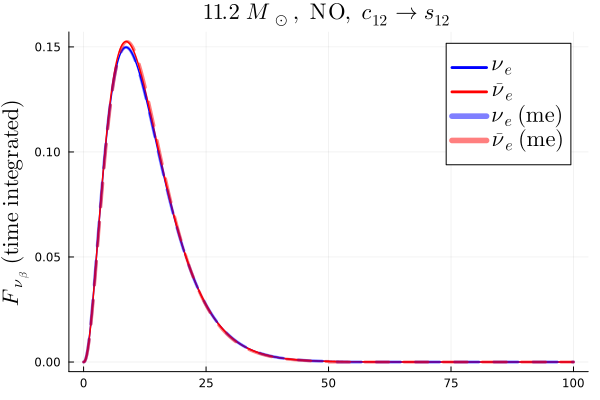

In [63]:
plot(F_sim_es, 
    [F_sim_νe_NO ./ loe_to_MeV F_sim_νebar_NO ./ loe_to_MeV],
    lw=1.5, 
    c=[:blue :red], 
    label=[L"\nu_e" L"\bar{\nu}_e"],
    title=L"11.2~M_\odot,~\mathrm{NO},~c_{12} \to s_{12}",
    ylabel=L"F_{\nu_\beta}~\mathrm{(time~integrated)}",
    yguidefontsize=15,
    titlefontsize=15,
    legendfontsize=15)
plot!(F_sim_es,
     [F.(F_sim_es, "e", "small", "NO") F.(F_sim_es, "ebar", "small", "NO")],
     lw=3,
     alpha=0.5,
     ls=:dash,
     c=[:blue :red],
     label=[L"\nu_e~\mathrm{(me)}" L"\bar{\nu}_e~\mathrm{(me)}"])

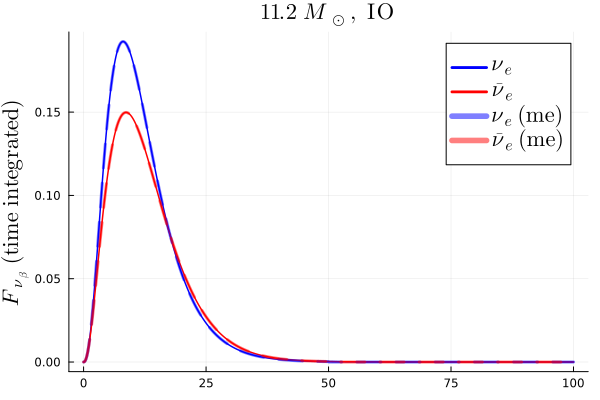

In [32]:
plot(F_sim_es, 
    [F_sim_νe_IO ./ loe_to_MeV F_sim_νebar_IO ./ loe_to_MeV],
    lw=1.5, 
    c=[:blue :red], 
    label=[L"\nu_e" L"\bar{\nu}_e"],
    title=L"11.2~M_\odot,~\mathrm{IO}",
    ylabel=L"F_{\nu_\beta}~\mathrm{(time~integrated)}",
    yguidefontsize=15,
    titlefontsize=15,
    legendfontsize=15)
plot!(F_sim_es,
     [F.(F_sim_es, "e", "small", "IO") F.(F_sim_es, "ebar", "small", "IO")],
     lw=3,
     alpha=0.5,
     ls=:dash,
     c=[:blue :red],
     label=[L"\nu_e~\mathrm{(me)}" L"\bar{\nu}_e~\mathrm{(me)}"])

In [33]:
# Supernova population functions

c0 = 3e8 # m s^(-1)

# Star formation rate (SFR)
SFR(z) = ((1 + z)^(-34) + ((1 + z)/5000)^3 + ((1 + z)/9)^(35))^(-0.1)

#Initial mass function (IMF)
η(M) = M^(-2.35)

# Unnormalized supernova rate (SNR0)
SNR0(z, M) = η(M) * SFR(z)

intSNR0 = quadgk(M -> SNR0(0, M), 8, 125)[1]
SNRnorm = 1.25e-4 / intSNR0 # units: 1.25e-4 Mpc^(-3) yr^(-1)

# Normalized SFR
SNR(z, M) = SNRnorm*SNR0(z, M);

# Hubble parameter dep on redshift:
function Hubble(z) 
    H0 = 70 # km s^(-1) Mpc^(-1)
    energy_matter, energy_dark = 0.3, 0.7
    return H0*sqrt(energy_matter*(1+z)^3 + energy_dark)
end

Hubble (generic function with 1 method)

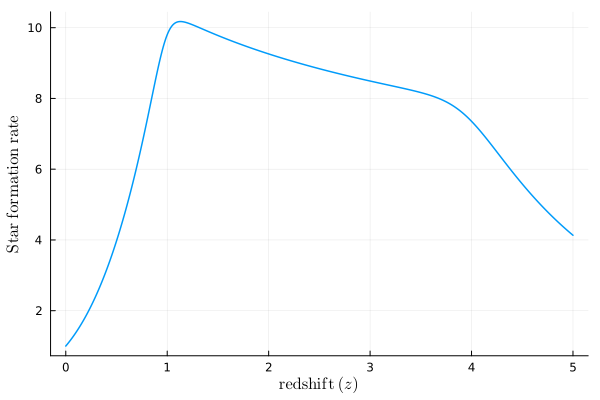

In [34]:
zs = range(0, 5, 1000)
plot(zs, SFR.(zs), lw=1.5, xlabel=L"\mathrm{redshift}~(z)", label=false, ylabel=L"\mathrm{Star~formation~rate}")

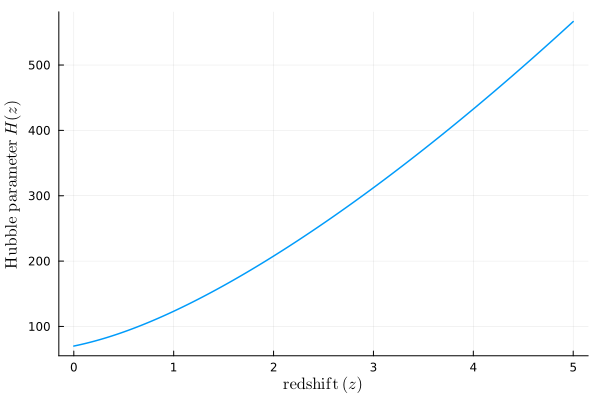

In [35]:
zs = range(0, 5, 1000)
plot(zs, Hubble.(zs), lw=1.5, xlabel=L"\mathrm{redshift}~(z)", label=false, ylabel=L"\mathrm{Hubble~parameter}~H(z)")

In [36]:
# "Fiducial model" 21% BH fraction
function F_f21_CCSN(E, M, z, β, ordering)
    if 8 <= M < 15
        return F(E*(1+z), β, "small", ordering)
    elseif 15 <= M < 22 || 25 <= M < 27
        return F(E*(1+z), β, "large", ordering)
    else
        return 0.0
    end
end
function F_f21_BHSN(E, M, z, β, ordering)
    if 22 <= M < 25 || 27 <= M < 125
        return F(E*(1+z), β, "bh", ordering)
    else
        return 0.0
    end
end;

In [37]:
# Antiderivative of IMF evaluated at endpts
ηAD(m_max, m_min) = (m_max^(-1.35)-m_min^(-1.35))/(-1.35)

ηAD (generic function with 1 method)

In [38]:
function DSNB_f21_integrand(E, M, z, β, ordering)
    c0 = 3e8 # m s^(-1)
    return (c0*SNR(z, M)/Hubble(z)) * (F_f21_CCSN(E, M, z, β, ordering) + F_f21_BHSN(E, M, z, β, ordering))
end;

# Manually integrated the M, only have to take the redshift integral with this integrand
function DSNB_integrand_old(E, z, β, ordering, bh_frac)
    c0 = 3e8 # m s^(-1)
    if bh_frac == "21"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (ηAD(15, 8)*0.79*F(E*(1+z), β, "small", ordering) 
        + (ηAD(22, 15)+ηAD(27, 25))*0.79*F(E*(1+z), β, "large", ordering) + (ηAD(25, 22)+ηAD(125, 27))*0.21*F(E*(1+z), β, "bh", ordering))
    elseif bh_frac == "41"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (ηAD(15, 8)*0.59*F(E*(1+z), β, "small", ordering) 
        + ηAD(125, 15)*0.41*F(E*(1+z), β, "bh", ordering))
    elseif bh_frac == "09"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (ηAD(15, 8)*0.91*F(E*(1+z), β, "small", ordering) 
        + ηAD(40, 15)*0.91*F(E*(1+z), β, "large", ordering) + ηAD(125, 40)*0.09*F(E*(1+z), β, "bh", ordering))
    else
        return 0
    end
end

# Pretty sure I was double counting the fractions in the above function, here's the corrected integrand
function DSNB_integrand(E, z, β, ordering, bh_frac)
    c0 = 3e8 # m s^(-1)
    if bh_frac == "21"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (ηAD(15, 8)*F(E*(1+z), β, "small", ordering) 
        + (ηAD(22, 15)+ηAD(27, 25))*F(E*(1+z), β, "large", ordering) + (ηAD(25, 22)+ηAD(125, 27))*F(E*(1+z), β, "bh", ordering))
    elseif bh_frac == "41"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (ηAD(15, 8)*F(E*(1+z), β, "small", ordering) 
        + ηAD(125, 15)*F(E*(1+z), β, "bh", ordering))
    elseif bh_frac == "09"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (ηAD(15, 8)*F(E*(1+z), β, "small", ordering) 
        + ηAD(40, 15)*F(E*(1+z), β, "large", ordering) + ηAD(125, 40)*F(E*(1+z), β, "bh", ordering))
    else
        return 0
    end
end

function DSNB_integrand_ccsn(E, z, β, ordering, bh_frac)
    c0 = 3e8 # m s^(-1)
    if bh_frac == "21"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (ηAD(15, 8)*F(E*(1+z), β, "small", ordering) 
        + (ηAD(22, 15)+ηAD(27, 25))*F(E*(1+z), β, "large", ordering))
    elseif bh_frac == "41"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (ηAD(15, 8)*F(E*(1+z), β, "small", ordering))
    elseif bh_frac == "09"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (ηAD(15, 8)*F(E*(1+z), β, "small", ordering) 
        + ηAD(40, 15)*F(E*(1+z), β, "large", ordering))
    else
        return 0
    end
end

function DSNB_integrand_bhsn(E, z, β, ordering, bh_frac)
    c0 = 3e8 # m s^(-1)
    if bh_frac == "21"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * ((ηAD(25, 22)+ηAD(125, 27))*F(E*(1+z), β, "bh", ordering))
    elseif bh_frac == "41"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (ηAD(125, 15)*F(E*(1+z), β, "bh", ordering))
    elseif bh_frac == "09"
        return (c0*SNRnorm*SFR(z)/Hubble(z)) * (ηAD(125, 40)*F(E*(1+z), β, "bh", ordering))
    else
        return 0
    end
end

DSNB_integrand_bhsn (generic function with 1 method)

In [39]:
first_int(E, z, β, ordering) = quadgk(M -> DSNB_f21_integrand(E, M, z, β, ordering), 8, 125)[1];
second_int(E, β, ordering) = 0.00208 * quadgk(z -> first_int(E, z, β, ordering), 0, 5)[1];

In [40]:
second_int(10, "e", "NO")

0.54105972846609

In [41]:
function DSNB(E, β, ordering, bh_frac) 
    if ordering == "NO"
        return propnorm_NO * 0.00208 * quadgk.(z -> DSNB_integrand.(E, z, β, ordering, bh_frac), 0, 5)[1]
    elseif ordering == "IO"
        return propnorm_IO * 0.00208 * quadgk.(z -> DSNB_integrand.(E, z, β, ordering, bh_frac), 0, 5)[1]
    end
end
DSNB_old(E, β, ordering, bh_frac) = 0.00208 * quadgk.(z -> DSNB_integrand_old.(E, z, β, ordering, bh_frac), 0, 5)[1]
DSNB_ccsn(E, β, ordering, bh_frac) = 0.00208 * quadgk.(z -> DSNB_integrand_ccsn.(E, z, β, ordering, bh_frac), 0, 5)[1]
DSNB_bhsn(E, β, ordering, bh_frac) = 0.00208 * quadgk.(z -> DSNB_integrand_bhsn.(E, z, β, ordering, bh_frac), 0, 5)[1]
# the 0.00208 is a normalization to make the units work out

DSNB_bhsn (generic function with 1 method)

In [42]:
DSNB(10, "e", "NO", "21")

0.2934684971801862

In [43]:
es_dsnb = range(0, 40, 100)

dsnb_test_e_f21 = DSNB.(es_dsnb, "e", "NO", "21")
dsnb_test_e_f41 = DSNB.(es_dsnb, "e", "NO", "41")
dsnb_test_e_f09 = DSNB.(es_dsnb, "e", "NO", "09")

dsnb_test_ebar_f21 = DSNB.(es_dsnb, "ebar", "NO", "21")
dsnb_test_ebar_f41 = DSNB.(es_dsnb, "ebar", "NO", "41")
dsnb_test_ebar_f09 = DSNB.(es_dsnb, "ebar", "NO", "09")

dsnb_test_e_f21_IO = DSNB.(es_dsnb, "e", "IO", "21")
dsnb_test_e_f41_IO = DSNB.(es_dsnb, "e", "IO", "41")
dsnb_test_e_f09_IO = DSNB.(es_dsnb, "e", "IO", "09")

dsnb_test_ebar_f21_IO = DSNB.(es_dsnb, "ebar", "IO", "21")
dsnb_test_ebar_f41_IO = DSNB.(es_dsnb, "ebar", "IO", "41")
dsnb_test_ebar_f09_IO = DSNB.(es_dsnb, "ebar", "IO", "09")
;

In [44]:
dsnb_test_e_f21_ccsn = DSNB_ccsn.(es_dsnb, "e", "NO", "21")
dsnb_test_e_f41_ccsn = DSNB_ccsn.(es_dsnb, "e", "NO", "41")
dsnb_test_e_f09_ccsn = DSNB_ccsn.(es_dsnb, "e", "NO", "09")

dsnb_test_e_f21_bhsn = DSNB_bhsn.(es_dsnb, "e", "NO", "21")
dsnb_test_e_f41_bhsn = DSNB_bhsn.(es_dsnb, "e", "NO", "41")
dsnb_test_e_f09_bhsn = DSNB_bhsn.(es_dsnb, "e", "NO", "09");

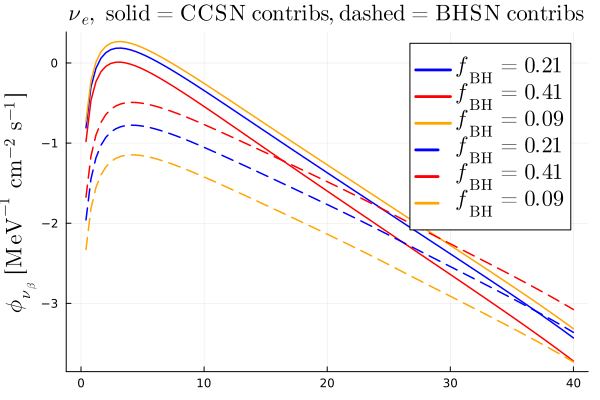

In [45]:
p1 = plot(es_dsnb, 
    [log10.(dsnb_test_e_f21_ccsn) log10.(dsnb_test_e_f41_ccsn) log10.(dsnb_test_e_f09_ccsn) log10.(dsnb_test_e_f21_bhsn) log10.(dsnb_test_e_f41_bhsn) log10.(dsnb_test_e_f09_bhsn)],
    c=[:blue :red :orange],
    lw=1.5,
    ls=[:solid :solid :solid :dash :dash :dash],
    label=[L"f_\mathrm{BH} = 0.21" L"f_\mathrm{BH} = 0.41" L"f_\mathrm{BH} = 0.09" L"f_\mathrm{BH} = 0.21" L"f_\mathrm{BH} = 0.41" L"f_\mathrm{BH} = 0.09"],
    title=L"\nu_e,~\mathrm{solid=CCSN~contribs, dashed=BHSN~contribs}",
    ylabel=L"\phi_{\nu_\beta}~[\mathrm{MeV^{-1}~cm^{-2}~s^{-1}}]",
    yguidefontsize=15,
    titlefontsize=15,
    legendfontsize=15,
)

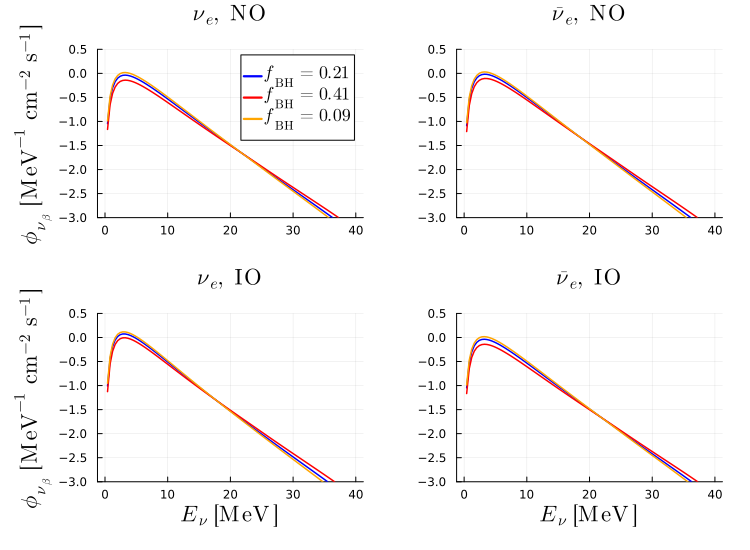

In [46]:
p1 = plot(es_dsnb, 
    [log10.(dsnb_test_e_f21) log10.(dsnb_test_e_f41) log10.(dsnb_test_e_f09)],
    c=[:blue :red :orange],
    lw=1.5,
    label=[L"f_\mathrm{BH} = 0.21" L"f_\mathrm{BH} = 0.41" L"f_\mathrm{BH} = 0.09"],
    title=L"\nu_e,~\mathrm{NO}",
    ylabel=L"\phi_{\nu_\beta}~[\mathrm{MeV^{-1}~cm^{-2}~s^{-1}}]",
    yguidefontsize=15,
    titlefontsize=15,
    legendfontsize=12,
)

p2 = plot(es_dsnb, 
    [log10.(dsnb_test_ebar_f21) log10.(dsnb_test_ebar_f41) log10.(dsnb_test_ebar_f09)],
    c=[:blue :red :orange],
    label=false,
    title=L"\bar{\nu}_e,~\mathrm{NO}",
    titlefontsize=15,
    lw=1.5
)

p3 = plot(es_dsnb, 
    [log10.(dsnb_test_e_f21_IO) log10.(dsnb_test_e_f41_IO) log10.(dsnb_test_e_f09_IO)],
    c=[:blue :red :orange],
    ylabel=L"\phi_{\nu_\beta}~[\mathrm{MeV^{-1}~cm^{-2}~s^{-1}}]",
    title=L"\nu_e,~\mathrm{IO}",
    xlabel=L"E_\nu~\mathrm{[MeV]}",
    label=false,
    titlefontsize=15,
    xguidefontsize=15,
    yguidefontsize=15,
    lw=1.5
)

p4 = plot(es_dsnb, 
    [log10.(dsnb_test_ebar_f21_IO) log10.(dsnb_test_ebar_f41_IO) log10.(dsnb_test_ebar_f09_IO)],
    c=[:blue :red :orange],
    title=L"\bar{\nu}_e,~\mathrm{IO}",
    xlabel=L"E_\nu~\mathrm{[MeV]}",
    titlefontsize=15,
    xguidefontsize=15,
    label=false,
    lw=1.5
)

plot(p1, p2, p3, p4, layout=(2,2), size=(750, 550), ylim=(-3, 0.5), margins=5Plots.mm)

In [47]:
# Trying to implement decays now

# Define this effective length function
energy_matter, energy_dark, H0 = 0.3, 0.7, 70
LeffIntegrand(z) = (H0*sqrt(energy_matter*(1+z)^3 + energy_dark))^(-1)*(1+z)^(-2)

leff_quadint(z0) = quadgk(z -> LeffIntegrand(z), 0, z0)[1]

zs_leff = range(0, 5, 1000)
leff_ne = Interpolations.interpolate((vec(zs_leff),), leff_quadint.(zs_leff), Gridded(Linear()))
leff = extrapolate(leff_ne, 0.0)

function decay(E, α, z)
    scalefactor = 4.678e28
    return exp(-scalefactor*α*leff(z)/E)
end

decay (generic function with 1 method)

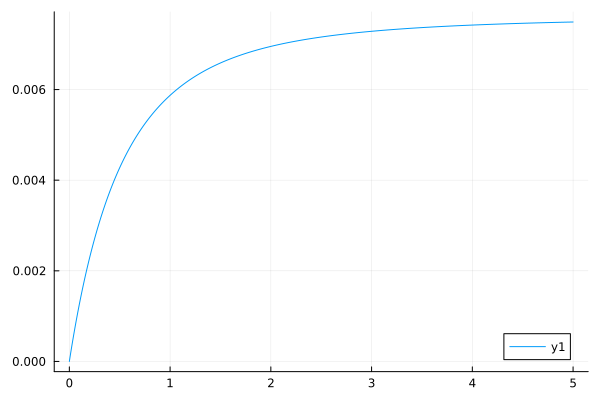

In [48]:
plot(zs_leff, leff.(zs_leff))

In [49]:
Usqred_NO

3×3 Matrix{Float64}:
 0.667424   0.310575  0.022001
 0.0776161  0.360937  0.561447
 0.25496    0.328488  0.416552

In [50]:
quadgk(z -> DSNB_integrand(10, z, "e", "NO", "21")*decay(10, 10^(-21), z), 0, 5)

(0.0, 0.0)

In [102]:
function decay_integrand(E, z, α, β, ordering, bh_frac)
    if α == 0
        return DSNB_integrand(E, z, β, ordering, bh_frac)
    else
        return DSNB_integrand(E, z, β, ordering, bh_frac)*decay(E, α, z)
    end
end

function DSNB_idecay(E, α::Vector{Float64}, β, ordering, bh_frac)
    if ordering == "NO"
        ν1 = @. Usqred_NO[1, 1]*quadgk(z -> decay_integrand(E, z, α[1], β, ordering, bh_frac), 0, 5)[1]
        ν2 = @. Usqred_NO[1, 2]*quadgk(z -> decay_integrand(E, z, α[2], β, ordering, bh_frac), 0, 5)[1]
        ν3 = @. Usqred_NO[1, 3]*quadgk(z -> decay_integrand(E, z, α[3], β, ordering, bh_frac), 0, 5)[1]
        return 0.00208*[ν1, ν2, ν3]
    elseif ordering == "IO"
        ν1 = @. Usqred_IO[1, 1]*quadgk(z -> DSNB_integrand(E, z, β, ordering, bh_frac)*decay(E, α[1], z), 0, 5)[1]
        ν2 = @. Usqred_IO[1, 2]*quadgk(z -> DSNB_integrand(E, z, β, ordering, bh_frac)*decay(E, α[2], z), 0, 5)[1]
        ν3 = @. Usqred_IO[1, 3]*quadgk(z -> DSNB_integrand(E, z, β, ordering, bh_frac)*decay(E, α[3], z), 0, 5)[1]
        return 0.00208*[ν1, ν2, ν3]
    else
        return 0.0
    end
end

DSNB_idecay (generic function with 1 method)

In [52]:
ν1(E) = @. Usqred_NO[1, 1]*quadgk(z -> DSNB_integrand(E, z, "e", "NO", "21")*decay(E, 10^(-25), z), 0, 5)[1]

ν1 (generic function with 1 method)

In [106]:
DSNB_sim = readdlm("Data/Miller-DSNB-flux.txt", comments=true);

In [108]:
dsnb_sim_es, dsnb_sim_ν1, dsnb_sim_ν2, dsnb_sim_ν3 = [DSNB_sim[:, i] for i in 1:4]

4-element Vector{Vector{Float64}}:
 [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0  …  39.1, 39.2, 39.3, 39.4, 39.5, 39.6, 39.7, 39.8, 39.9, 40.0]
 [0.00938937598875317, 0.041866254150356934, 0.09763439471941424, 0.17380800516659148, 0.26655423540826095, 0.3718592104559162, 0.4858807436852827, 0.6051234561759589, 0.7265261833859981, 0.8474979618806311  …  0.001541036663102836, 0.0015155470890491568, 0.0014905105490792044, 0.001465918440216824, 0.0014417623326210618, 0.0014180339659229835, 0.0013947252456435366, 0.0013718282396904557, 0.0013493351749324478, 0.0013272384338488998]
 [0.008985989891322814, 0.04156603781680808, 0.09984103672157361, 0.18189344149891964, 0.2841795493500007, 0.4024989805354522, 0.5325097961797322, 0.6700364513465616, 0.8112659611048797, 0.952867788623935  …  0.0013529206185077475, 0.0013300966270158568, 0.0013076855301736188, 0.001285679363429693, 0.0012640703249234115, 0.0012428507719872204, 0.0012220132177279668, 0.0012015503276850727, 0.00118145491656382

In [109]:
es_test = dsnb_sim_es

# DSNB_test_decay = DSNB_idecay(es_test, [10^(-25), 0.0, 0.0], "e", "NO", "21")
DSNB_test_no_decay_ν1, DSNB_test_no_decay_ν2, DSNB_test_no_decay_ν3 = DSNB_idecay(es_test, [0.0, 0.0, 0.0], "e", "NO", "21");

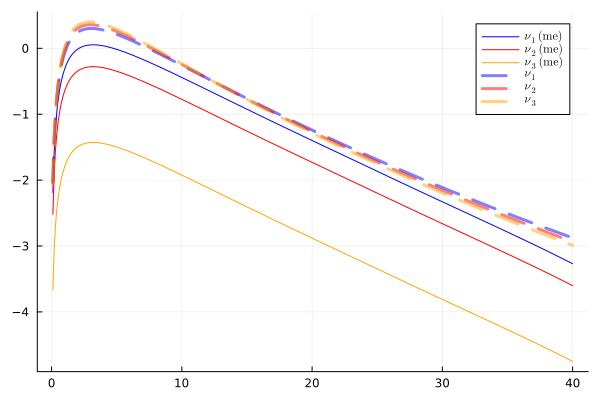

In [113]:
plot(
    es_test,
    [log10.(DSNB_test_no_decay_ν1) log10.(DSNB_test_no_decay_ν2) log10.(DSNB_test_no_decay_ν3)],
    c=[:blue :red :orange],
    label=[L"\nu_1~\mathrm{(me)}" L"\nu_2~\mathrm{(me)}" L"\nu_3~\mathrm{(me)}"]
)
plot!(
    es_test,
    [log10.(dsnb_sim_ν1) log10.(dsnb_sim_ν2) log10.(dsnb_sim_ν3)],
    ls=:dash,
    lw=3,
    alpha=0.5,
    c=[:blue :red :orange],
    label=[L"\nu_1" L"\nu_2" L"\nu_3"]
)